In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from multisoc.generate.two_dimensional_population import relative_correlation_inv
from multisoc.generate.two_dimensional_population import relative_correlation
from multisoc.generate.two_dimensional_population import consol_comp_pop_frac_tnsr

from multisoc.generate.multidimensional_network import multidimensional_network_fix_av_degree

from multisoc.generate.utils import G_attr_to_str

## Plot regions with different group size rankings

In [2]:
marginals_representatives= np.array([
        [0.1, 0.35],
        [0.23, 0.3],
        [0.18, 0.45],
        [0.25,0.42],
        [0.35,0.43],
    ])

kappa_values = np.array([
    [relative_correlation_inv(0.35,-0.5),.35,relative_correlation_inv(0.35,0.5)],
    [relative_correlation_inv(0.3,-0.5),.3,relative_correlation_inv(0.3,0.7),],
    [relative_correlation_inv(0.45,-0.7),.45,relative_correlation_inv(0.45,0.5)],
    [relative_correlation_inv(0.42,-0.7),.42,relative_correlation_inv(0.42,0.8)],
    [relative_correlation_inv(0.43,-0.7),.43,relative_correlation_inv(0.43,0.65)]
])

## Approx. same values as these
# kappa_values = np.array([
#     [.175,.35,.7],
#     [.15,.3,.8],
#     [.135,.45,.72],
#     [.126,.42,.9],
#     [.129,.43,.8]
# ])

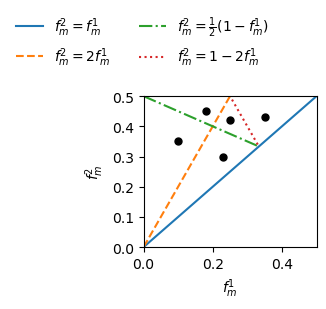

In [4]:
plt.figure(figsize=(3,3))

f1 = np.linspace(0,0.5,1000)
f2_a = 2*f1
f2_b = 0.5*(1-f1)
f2_c = 1-2*f1

plt.plot(f1,f1,label=r"$f^2_m=f^1_m$")
plt.plot(f1[f2_a>f1],f2_a[f2_a>f1],"--",label=r"$f^2_m=2 f^1_m$")
plt.plot(f1[f2_b>f1],f2_b[f2_b>f1],"-.",label=r"$f^2_m=\frac{1}{2}(1-f^1_m)$")
plt.plot(f1[f2_c>f1],f2_c[f2_c>f1],":",label=r"$f^2_m=1-2 f^1_m$")

plt.ylim(0,0.5)
plt.xlim(0,0.5)

plt.xlabel(r"$f^1_m$")
plt.ylabel(r"$f^2_m$")
plt.legend(bbox_to_anchor=(0.1,1.1, .7, 0.1),ncol=2,frameon=False)

plt.plot(marginals_representatives[:,0],marginals_representatives[:,1],"ok",ms=5)

plt.tight_layout()

plt.savefig(f"temp/Fig2_left.png",dpi=600,)

plt.show()

## Generate networks
The networks are saved in gexf format and opened with gephi (https://gephi.org/) for graphical representation.

In [5]:
N = 2000
kind = "all"
p_d = [0.5, 0.5]

for i, (f1m,f2m) in enumerate(marginals_representatives):
    print ("---------------------------------",f1m, f2m)
    h_mtrx_lst = [ np.array([[0.85,0.15],[0.15,0.85]]), np.array([[0.85,0.15],[0.15,0.85]]) ] ## List of 1d homophily matrices
    pop_fracs_lst = [[f1m,1-f1m],[f2m,1-f2m]] ## The marginals of the population distribution defined by comp_pop_frac_tnsr
    for consol in kappa_values[i]:
        print (consol)
        comp_pop_frac_tnsr = consol_comp_pop_frac_tnsr(pop_fracs_lst,consol)
        
        G = multidimensional_network_fix_av_degree(
                        h_mtrx_lst,
                        comp_pop_frac_tnsr,
                        kind,
                        directed=True,
                        pop_fracs_lst = pop_fracs_lst,
                        N=N,
                        m=10,
                        v = 0,
                        p_d = p_d
                        )
    
        G_out = G_attr_to_str(G,"attr") ## Needed to conver tuple attributes to string to avoid errors with gexf format
        nx.write_gexf(G_out,f"./temp/network_2D_all_f1m{f1m}_f2m{f2m}_k{consol}.gexf")

--------------------------------- 0.1 0.35
0.175
0.35
0.675
--------------------------------- 0.23 0.3
0.15
0.3
0.7899999999999999
--------------------------------- 0.18 0.45
0.135
0.45
0.7250000000000001
--------------------------------- 0.25 0.42
0.126
0.42
0.8840000000000001
--------------------------------- 0.35 0.43
0.129
0.43
0.8005
